In [60]:
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
finviz_url = 'https://finviz.com/quote.ashx?t='
tickers = ['NVDA', 'GOOG', 'MSFT', 'TSLA',]



In [62]:
news_tables = {}
for ticker in tickers:
    url = finviz_url + ticker 
    
    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)

    html = BeautifulSoup(response, features='html.parser')
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table

In [ ]:
parsed_data = []

for ticker, news_table in news_tables.items():

    for row in news_table.findAll('tr'):

        title = row.a.text.strip() 
        date_data = row.td.text.strip().split(' ')  

        if len(date_data) == 1: 
            date = None  
            time = date_data[0].strip()
        else:  
            date = date_data[0].strip()
            time = date_data[1].strip()

     
        parsed_data.append([ticker, date, time, title])


df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])
df

,ticker,date,time,title
0,NVDA,Today,03:45PM,NVIDIAs (NVDA) Role in a $500B AI Future: Buy ...
1,NVDA,None,03:21PM,"Magnificent Seven Stocks: Nvidia Sells Off, Te..."
2,NVDA,None,12:38PM,Alphabet Has an Nvidia-Like Business. It Could...
3,NVDA,None,12:25PM,Reliance plans world's biggest AI data center ...
4,NVDA,None,12:06PM,Nvidia Stock Drops as Meta Unveils Bold AI Amb...
...,...,...,...,...
395,TSLA,None,10:20AM,Ramaswamy Leaves DOGE. Its Up to Elon Musk to ...
396,TSLA,None,10:19AM,Trump Orders Removal of EV-Favoring Policies a...
397,TSLA,None,10:15AM,"Elon Musk, The Richest Man In The World, Is Es..."
398,TSLA,None,10:00AM,Guest commentary: The Donald Trump-Elon Musk h...


In [64]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [65]:
vader = SentimentIntensityAnalyzer()

In [ ]:
from datetime import datetime, timedelta


def clean_date(date_str):
    if not date_str or pd.isna(date_str):  
        return None
    
    today = datetime.today().date()
    if "Today" in date_str:
        return today
    elif "Yesterday" in date_str:
        return today - timedelta(days=1)
    else:
        try:
            return pd.to_datetime(date_str).date()  
        except Exception:
            return None  


df['date'] = df['date'].apply(clean_date)


df = df.dropna(subset=['date'])


df['date'] = pd.to_datetime(df['date']).dt.date

C:\Users\maxar\AppData\Local\Temp\ipykernel_22348\3398304813.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date']).dt.date


f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)
df['date'] = pd.to_datetime(df.date).dt.date

C:\Users\maxar\AppData\Local\Temp\ipykernel_22348\1777814431.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['compound'] = pd.to_numeric(df['compound'], errors='coerce')


<Figure size 1000x800 with 0 Axes>

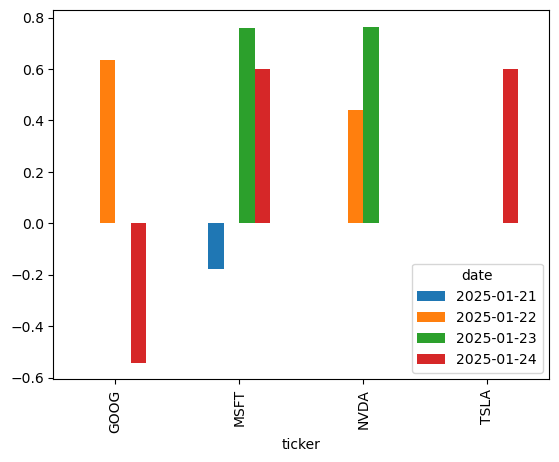

In [ ]:

df['compound'] = pd.to_numeric(df['compound'], errors='coerce')


df = df.dropna(subset=['compound'])


mean_df = df.groupby(['ticker', 'date'])['compound'].mean().unstack()


plt.figure(figsize=(10, 8))
mean_df.plot(kind='bar')
plt.show()